# Mesh example: Simple mesh geometry

This example is from Calfem for Python Mesh Manual (Mesh_Ex_01.py)

Shows how to create simple geometry from splines and ellipse arcs, and how to mesh a quad mesh in GmshMesher. Also demonstrates drawGeometry(), drawMesh, and drawing texts and labels in a figure.

In [1]:
import calfem.geometry as cfg
import calfem.mesh as cfm
import calfem.vis_mpl as cfv

## Define geometry

Create geometry object.

In [2]:
g = cfg.Geometry()

### Add points to geometry object.

The first parameter is the coordinates. These can be in 2D or 3D. The other parameters are not defined in this example. These parameters are ID, marker, and elSize.
Since we do not specify an ID the points are automatically assigned IDs, starting from 0.

In [3]:
g.point([0, 0])
g.point([2, 0])
g.point([2, 1])
g.point([0, 1])
g.point([0.5, 0.3])
g.point([0.3, 0.7])
g.point([0.7, 0.7])
g.point([0.8, 0.5])
g.point([1.7, 0.5])
g.point([1.5, 0.5])
g.point([1.7, 0.7])

### Add curves

There are four types of curves. In this example we create an ellipse arc and some splines. The first parameter is a list of point IDs that define the curve. Curves can have have IDs and markers. In this example the IDs are undefined so the curves are automatically assigned IDs. The markers can be used for identifying regions/boundaries in the model.

In [4]:
g.ellipse([7, 8, 9, 10], marker=50)

g.spline([0, 1], marker=80)           # 1 - A spline. Splines pass through the
                                      #     points in the first parameter.
g.spline([2, 1])                      # 2
g.spline([3, 2])                      # 3
g.spline([0, 3])                      # 4
g.spline([7, 9], marker=50)           # 5
g.spline([10, 9])                     # 6
g.spline([4, 5, 6, 4])                # 7 - This is a closed spline.
                                      #     The start and end points are the same

### Add a surface

Surfaces are defined by its curve boundaries. The first parameter is a list of curve IDs that specify the outer boundary of the surface. The second parameter is a list of lists of curve IDs that specify holes in the surface. In this example there are two holes. The boundaries and holes must be closed paths. We can see that [7] is closed because curve 7 is a closed spline. addSurface creates a flat surface, so all curves must lie on the same plane.

In [5]:
g.surface([4, 3, 2, 1], [[7], [5, 6, 0]])

## Generate mesh

### Define mesh properties

In [6]:
mesh = cfm.GmshMesh(g)

Element type 3 is quad. 2 is triangle. See user manual for more element types)

In [7]:
mesh.el_type = 3
mesh.dofs_per_node = 1  # Degrees of freedom per node.
mesh.el_size_factor = 0.05  # Factor that changes element sizes.

### Create mesh 

The first four return values are the same as those that trimesh2d() returns. coords is as list of node coordinates. edof is the element topology (element degrees of freedom). dofs is a lists of all degrees of freedom bdofs is a dictionary of boundary dofs (dofs of geometric entities with markers). elementmarkers is a list of markers, and is used for finding the marker of a given element (index).

In [8]:
coords, edof, dofs, bdofs, elementmarkers = mesh.create()

Info    : GMSH -> Python-module


## Visualise mesh

### Draw geometry

In [9]:
#%matplotlib notebook
%matplotlib inline
# %matplotlib widget

### Draw mesh

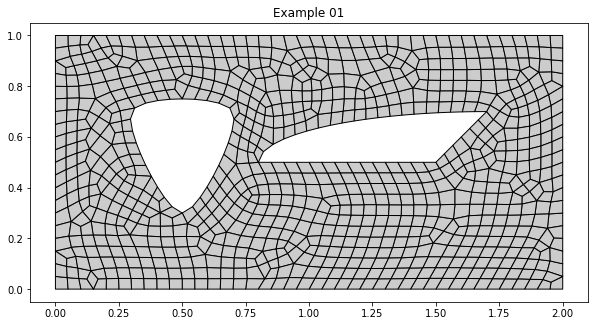

In [10]:
cfv.figure(fig_size=(10,10))
cfv.draw_mesh(
    coords=coords,
    edof=edof,
    dofs_per_node=mesh.dofs_per_node,
    el_type=mesh.el_type,
    filled=True,
    title="Example 01"
)